<h1>Part 2: Code Quiz<h1>

<b>Study case</b>: We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use SVC (SVM for classification) and Decision Tree (ID3) algorithms.

In [7]:
# import all libraries required : (e.g: numpy and pandas, sklearn, matplotlib, etc)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import os
print(os.listdir("../content/sample_data"))

['anscombe.json', 'README.md', 'Heart.csv', 'mnist_train_small.csv', 'mnist_test.csv', 'california_housing_test.csv', 'california_housing_train.csv']


In [8]:
data=pd.read_csv('../content/sample_data/Heart.csv')

In [12]:
# shows attributes, number of data and the data types for each attributes 
# AHD is Acquired heart diseases ~ TARGET Class
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [16]:
# remove column 'Unnamed: 0'
data.drop('Unnamed: 0', inplace=True, axis=1)

In [17]:
# print 'Data First 5 Rows Show'
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [18]:
# print 'Data Last 5 Rows Show'
data.tail()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes
302,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [19]:
# print the statistic of the dataset (count, mean, SD, min, max, etc )
data.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [20]:
# check null on all data and If data has null, by sum of null data's
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [14]:
data.isnull().values.any()

True

In [23]:
# Try removing all the rows from the dataset that contain missing values. How many are left?
data2 = data.dropna()

In [24]:
data2.isnull().values.any()

False

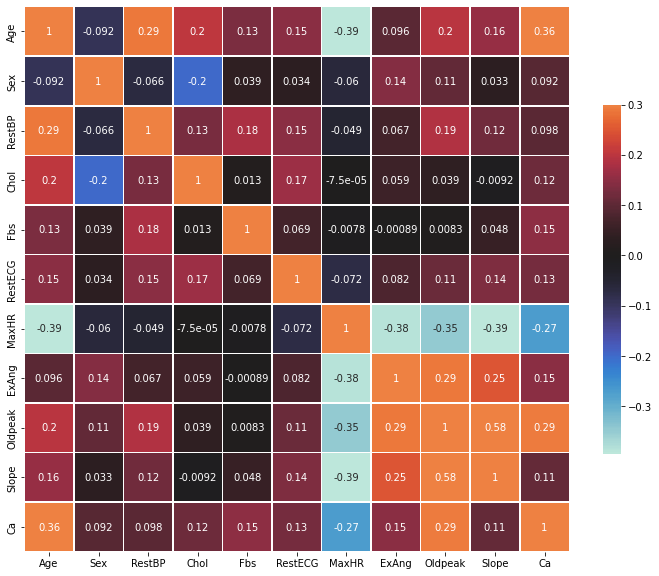

In [25]:
# print correlation data for each attributes
plt.figure(figsize=(10,10))
sns.heatmap(data2.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

Lets do some attribute analysis (Age Analysis)

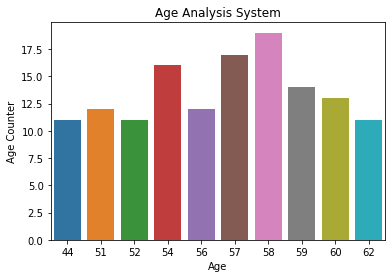

In [103]:
# Print variance age data from dataset
sns.barplot(x=data2.Age.value_counts()[:10].index,y=data.Age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

In [104]:
# divided into the elderly (>55yo),middle-aged(40-55yo), young(<40yo) people by looking at the age ranges.
minAge=min(data2.Age)
maxAge=max(data2.Age)
meanAge=data2.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.54208754208754


In [105]:
# Count the age from dataset into elderly,middle-aged, young people and shows a Bar Plot
young_ages=data2[(data2.Age>=29)&(data2.Age<40)]
middle_ages=data2[(data2.Age>=40)&(data2.Age<55)]
elderly_ages=data2[(data2.Age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 14
Middle Ages : 124
Elderly Ages : 151


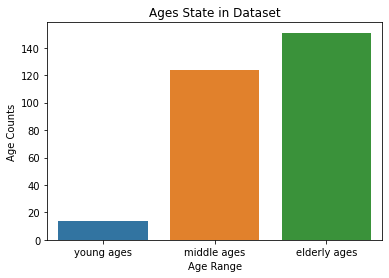

In [106]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


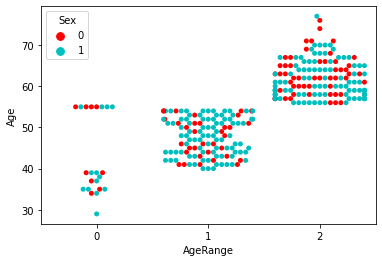

In [107]:
#add new column 'AgeRange' into dataset and normalize the data
data2['AgeRange']=0
youngAge_index=data2[(data2.Age>=29)&(data2.Age<40)].index
middleAge_index=data2[(data2.Age>=40)&(data2.Age<55)].index
elderlyAge_index=data2[(data2.Age>55)].index
for index in elderlyAge_index:
    data2.loc[index,'AgeRange']=2
    
for index in middleAge_index:
    data2.loc[index,'AgeRange']=1

for index in youngAge_index:
    data2.loc[index,'AgeRange']=0

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="AgeRange", y="Age",hue='Sex',
              palette=["r", "c", "y"], data=data2)
plt.show()

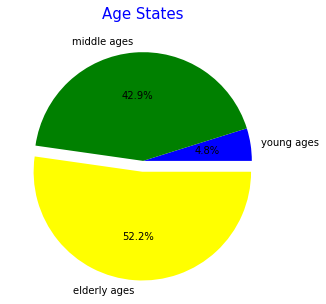

In [108]:
# Show rangeage distributions 
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize = (5,5))
#plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

In [114]:
data2.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,AgeRange
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,1,0,2
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,0,1,2
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2,1,2
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,0,0,0
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,0,0,1


# MODEL, TRAINING and TESTING

As a result of our initial evaluations, we have used a number of artificial learning algorithms. support vector machine (SVM) and Decision Trees algorithms. To implement this algorithm model, we need to separate dependent and independent variables within our data sets. In addition, we created a combination of features between different features to make different experiments. While creating these parameters, the process of finding the best results was made by giving hyper parameter values.

As is known, most of our data are categorized and not categorized only among certain feature values. We will perform scale operations to eliminate these situations.

In a data set, the data that are distant from each other are made to scale between each other by making a specific scaling. As a result of this operation, the data takes a value of 0.1. This may change in some scaling operations. Standard and Normalization scale will be used for our operation. There is a big change between the data obtained. Therefore, we need to use this method for SVM algorithm.

In [113]:
# some of the data is still in string, so we need to change it to number (ChestPain, Thal, and AHD)
data2['AHD']=data2['AHD'].map(dict(Yes=1, No=0))
data2['Thal'] = data2['Thal'].map(dict(normal=0 ,fixed=1, reversable=2))
data2['ChestPain'] = data2['ChestPain'].map(dict(typical=0 ,asymptomatic=1, nonanginal=2, nontypical=3))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [115]:
#Let's see how the correlation (P-values) between dataset after all data strings are changes into number
data2.corr()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,AgeRange
Age,1.000000,-0.092399,-0.177350,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075,0.804718
Sex,-0.092399,1.000000,-0.125461,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467,-0.026418
ChestPain,-0.177350,-0.125461,1.000000,-0.145533,-0.009868,-0.009778,-0.152228,0.281159,-0.306772,-0.332824,-0.249821,-0.188391,-0.279568,-0.345996,-0.185552
RestBP,0.290476,-0.066340,-0.145533,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490,0.229194
Chol,0.202644,-0.198089,-0.009868,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285,0.122045
Fbs,0.132062,0.038850,-0.009778,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167,0.142153
RestECG,0.149917,0.033897,-0.152228,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343,0.158996
MaxHR,-0.394563,-0.060496,0.281159,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817,-0.298518
ExAng,0.096489,0.143581,-0.306772,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355,0.067140
Oldpeak,0.197123,0.106567,-0.332824,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052,0.138413


In [118]:
# loaded dataset as input and returns the dataset split into two subsets
# split a dataset into train and test sets (Train: 67%, Test: 33%)
from sklearn.model_selection import train_test_split

dataX=data2.drop('AHD',axis=1)
dataY=data2['AHD']
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.33,random_state=42)

In [119]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (198, 14)
X_test (99, 14)
y_train (198,)
y_test (99,)


The difference in value between our data is too big. It increases both the volume and the results are very bad. To reduce this situation we need to use the StandardScaler function. A value of -1.1 will be obtained after using it.

In [120]:
#Normalization as the first process
# Normalize
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

The diagonal values we see in these correlation values are always 1.0. That doesn't mean much to us. But the minus value is a big problem for me, but the value of the transactions are more valuable for us.

Now it is time to implement PCA to the data set.

But, before that, I will investigate the explained variance ratio and resulting principal components:

In [121]:
# investigate the explained variance ratio and resulting principal components
from sklearn.decomposition import PCA
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(X_train.columns.values.tolist())
print(pca.components_)

[0.25367752 0.16538636 0.12256074 0.11101272 0.08857881 0.06678948
 0.0522359  0.04653455 0.03712743 0.0174158  0.01342565 0.01153887
 0.00847866 0.0052375 ]

['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AgeRange']
[[ 5.26543991e-02  4.62788918e-01 -1.96996222e-01  2.40295734e-02
  -9.85077447e-04  9.52112213e-03  7.93873718e-03 -1.10200288e-01
   5.00269704e-01  1.54859470e-01  1.45845836e-01  2.13401253e-01
   6.19288084e-01  8.24025777e-02]
 [ 1.00942127e-01 -1.42977620e-01 -7.77228646e-02  5.22993892e-02
   5.06553344e-02  1.64232525e-01  9.24748480e-01 -3.47695901e-02
   6.88869132e-02  4.80035474e-02  9.84215665e-02  1.61633683e-01
  -1.13784725e-01  1.37390294e-01]
 [ 7.32447569e-02 -6.25039841e-01 -5.71893485e-02 -2.21757757e-02
   4.16658771e-02 -2.08514177e-01 -1.76517954e-01 -1.29862713e-01
   6.44954813e-01  1.09835277e-01  2.08327625e-01 -5.32612173e-02
  -1.63497717e-01  7.72122926e-02]
 [ 2.74226235e

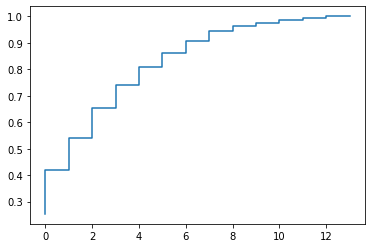

In [122]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

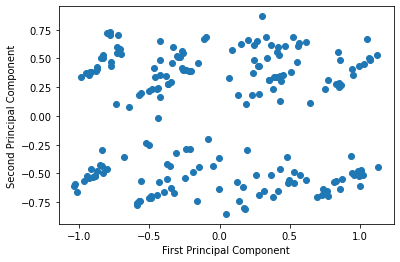

In [123]:
#apply PCA to the data with number of components = 8
pca = PCA(n_components=8)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

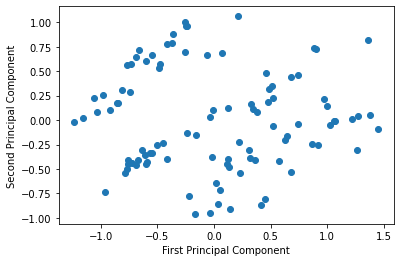

In [124]:
pca = PCA(n_components=8)
pca.fit(X_test)
reduced_data_test = pca.transform(X_test)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

According to the principal components, data points with greater values on the x-axis represent the customers that are less likely to spend to Detergents_Paper category.

Likewise, data points with greater values on the y-axis represent the customers that are less likely to spend to Fresh and Frozen categories.

Now, you can constitute a DataFrame out of my reduced data with two dimensions:

In [126]:
reduced_data_train = pd.DataFrame(reduced_data_train, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
reduced_data_test = pd.DataFrame(reduced_data_test, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8'])
X_train=reduced_data_train
X_test=reduced_data_test

In [127]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def plot_feature_importances(gbm):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [128]:
combine_features_list=[
    ('Dim1','Dim2','Dim3'),
    ('Dim4','Dim5','Dim5','Dim6'),
    ('Dim7','Dim8','Dim1'),
    ('Dim4','Dim8','Dim5')
]

**SVM**

In [135]:
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [136]:
parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dtr = GridSearchCV(SVC(), parameters, scoring='accuracy')
    
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)  

**************************************************
Best parameters set:
{'random_state': 42}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       107
           1       0.80      0.81      0.80        91

    accuracy                           0.82       198
   macro avg       0.82      0.82      0.82       198
weighted avg       0.82      0.82      0.82       198

**************************************************
Train Confusion Matrix:
[[88 19]
 [17 74]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        53
           1       0.82      0.78      0.80        46

    accuracy                           0.82        99
   mac

**Decision Tree**

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dtr = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='accuracy')
    
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=DecisionTreeClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)  

**************************************************
Best parameters set:
{'random_state': 42}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        91

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198

**************************************************
Train Confusion Matrix:
[[107   0]
 [  0  91]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        53
           1       0.68      0.59      0.63        46

    accuracy                           0.68        99
  

**Last thing, What you could conclude with this analysis?**